**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

**Total regions**

In [10]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "annotation_enhancer_merge")
fname = "enhancer_merge.region.starrmpra_crispri_atac.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)
dat = dat %>% dplyr::mutate(Peak = paste0(Chrom, ":", Start, "-", End))

dat_peak_total = dat
print(dim(dat))
head(dat, 15)

[1] 350813      6


Chrom,Start,End,Assay_Type,Assay_Label,Peak
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,10015,10442,ATAC,ATAC,chr1:10015-10442
chr1,14253,14645,ATAC,ATAC,chr1:14253-14645
chr1,16015,16477,ATAC,ATAC,chr1:16015-16477
chr1,17237,17772,ATAC,ATAC,chr1:17237-17772
chr1,28903,29613,ATAC,ATAC,chr1:28903-29613
chr1,30803,31072,ATAC,ATAC,chr1:30803-31072
chr1,101603,101849,ATAC,ATAC,chr1:101603-101849
chr1,115411,115986,ATAC,ATAC,chr1:115411-115986
chr1,118518,118743,ATAC,ATAC,chr1:118518-118743


**Regions contains cCREs**

In [2]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "annotation_enhancer_merge", 
    "summary_starrmpra_crispri_atac")
fname = "peak.summary.ccre_v4.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_summary = dat
print(dim(dat))
head(dat)

[1] 231554      7


Peak,Annotation,Label,Count,Region,Score,Note
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
chr1:10015-10442,ccre_v4,Low-DNase,1,chr1:10033-10250,0,EH38E2776516:Low-DNase
chr1:16015-16477,ccre_v4,Low-DNase,1,chr1:16097-16381,0,EH38E3951272:Low-DNase
chr1:17237-17772,ccre_v4,Low-DNase,1,chr1:17343-17642,0,EH38E3951273:Low-DNase
chr1:28903-29613,ccre_v4,Low-DNase,1,chr1:29320-29517,0,EH38E3951274:Low-DNase
chr1:115411-115986,ccre_v4,CA-CTCF,1,chr1:115562-115912,0,EH38E3951280:CA-CTCF
chr1:118518-118743,ccre_v4,Low-DNase,1,chr1:118508-118826,0,EH38E3951281:Low-DNase


## Proportion

In [15]:
dat = dat_peak_total
dat = dat %>% tidyr::separate_longer_delim(Assay_Type, ",")
lst = split(dat$Peak, dat$Assay_Type)
lst = lapply(lst, function(vec){
    return(unique(vec))
})

lst_peak_total = lst

In [16]:
dat = dat_peak_annot_summary
lst = split(dat$Peak, dat$Label)
lst = lapply(lst, function(vec){
    return(unique(vec))
})
lst_peak_annot = lst

**Explore results**

In [17]:
dat = dat_peak_arrange
table(dat$Assay_Type)


        ASTARR           ATAC    CRISPRi-E2G CRISPRi-Growth  CRISPRi-HCRFF 
         19646         247443            380           6171             75 
         LMPRA          TMPRA         WSTARR 
         38910           7820         128788 

In [18]:
dat = dat_peak_annot_summary
table(dat$Annotation)


ccre_v4 
 231554 

In [19]:
lst = lst_peak_total
res = lapply(lst, length)
print(res)

$ASTARR
[1] 19646

$ATAC
[1] 247443

$`CRISPRi-E2G`
[1] 380

$`CRISPRi-Growth`
[1] 6171

$`CRISPRi-HCRFF`
[1] 75

$LMPRA
[1] 38910

$TMPRA
[1] 7820

$WSTARR
[1] 128788



In [14]:
lst = lst_peak_annot
res = lapply(lst, length)
print(res)

$`CA-CTCF`
[1] 21943

$`CA-H3K4me3`
[1] 2941

$`CA-only`
[1] 1320

$`CA-TF`
[1] 24802

$dELS
[1] 15151

$`Low-DNase`
[1] 141102

$pELS
[1] 12330

$PLS
[1] 11965



In [67]:
lst = lapply(lst_peak_total, function(vec_peak_total){
    lst = lapply(lst_peak_annot, function(vec_peak_annot){
        vec = vec_peak_total %in% vec_peak_annot
        vec = c(sum(vec), length(vec_peak_total), mean(vec))
        names(vec) = c("Count", "Total", "Freq")
        return(vec)
    })
    dat = bind_rows(lst, .id="Category")
    return(dat)
})
dat = bind_rows(lst, .id="Assay")

dat_peak_annot_summary = dat
print(dim(dat))
dat

[1] 64  5


Assay,Category,Count,Total,Freq
<chr>,<chr>,<dbl>,<dbl>,<dbl>
ASTARR,CA-CTCF,1312,19646,0.066782042
ASTARR,CA-H3K4me3,1576,19646,0.080219892
ASTARR,CA-only,121,19646,0.006159015
ASTARR,CA-TF,1869,19646,0.095133869
ASTARR,dELS,3561,19646,0.181258271
ASTARR,Low-DNase,6477,19646,0.329685432
ASTARR,pELS,5304,19646,0.269978622
ASTARR,PLS,6042,19646,0.307543520
ATAC,CA-CTCF,20462,247443,0.082693792


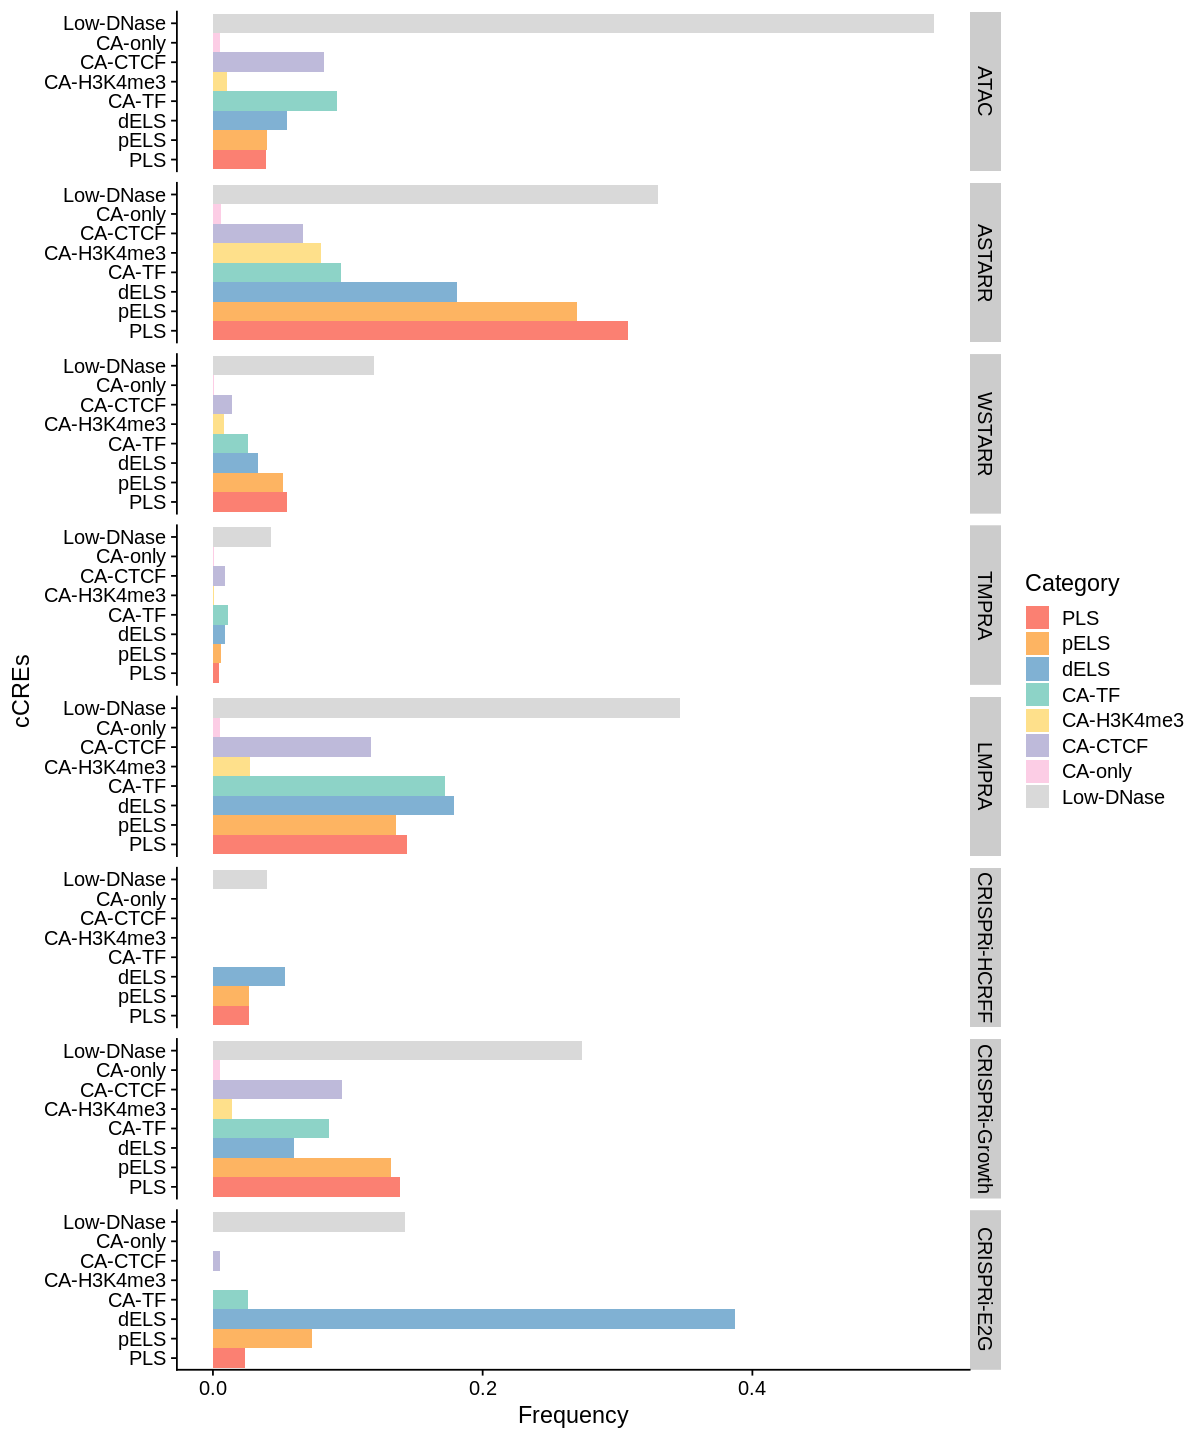

In [71]:
dat = dat_peak_annot_summary

vec = c("ATAC", "ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth", "CRISPRi-E2G")
dat = dat %>% dplyr::mutate(Assay = factor(Assay, levels=vec))

vec = c("PLS", "pELS", "dELS", "CA-TF", "CA-H3K4me3", "CA-CTCF", "CA-only", "Low-DNase")
dat = dat %>% dplyr::mutate(Category = factor(Category, levels=vec))

vec = c(
    "PLS"        = "#fb8072", 
    "pELS"       = "#fdb462", 
    "dELS"       = "#80b1d3", 
    "CA-TF"      = "#8dd3c7", 
    "CA-H3K4me3" = "#fee08b",  
    "CA-CTCF"    = "#bebada", 
    "CA-only"    = "#fccde5", 
    "Low-DNase"  = "#d9d9d9")
theme_fill = scale_fill_manual(values = vec)

gpt = ggplot(dat, aes(x=Freq, y=Category, fill=Category)) +
    geom_col(width=1, position = position_dodge(width = 0.9)) +
    labs(x="Frequency", y="cCREs") +
    theme_cowplot() +
    theme_fill +
    facet_grid(Assay~.)

options(repr.plot.height=12, repr.plot.width=10)
print(gpt)

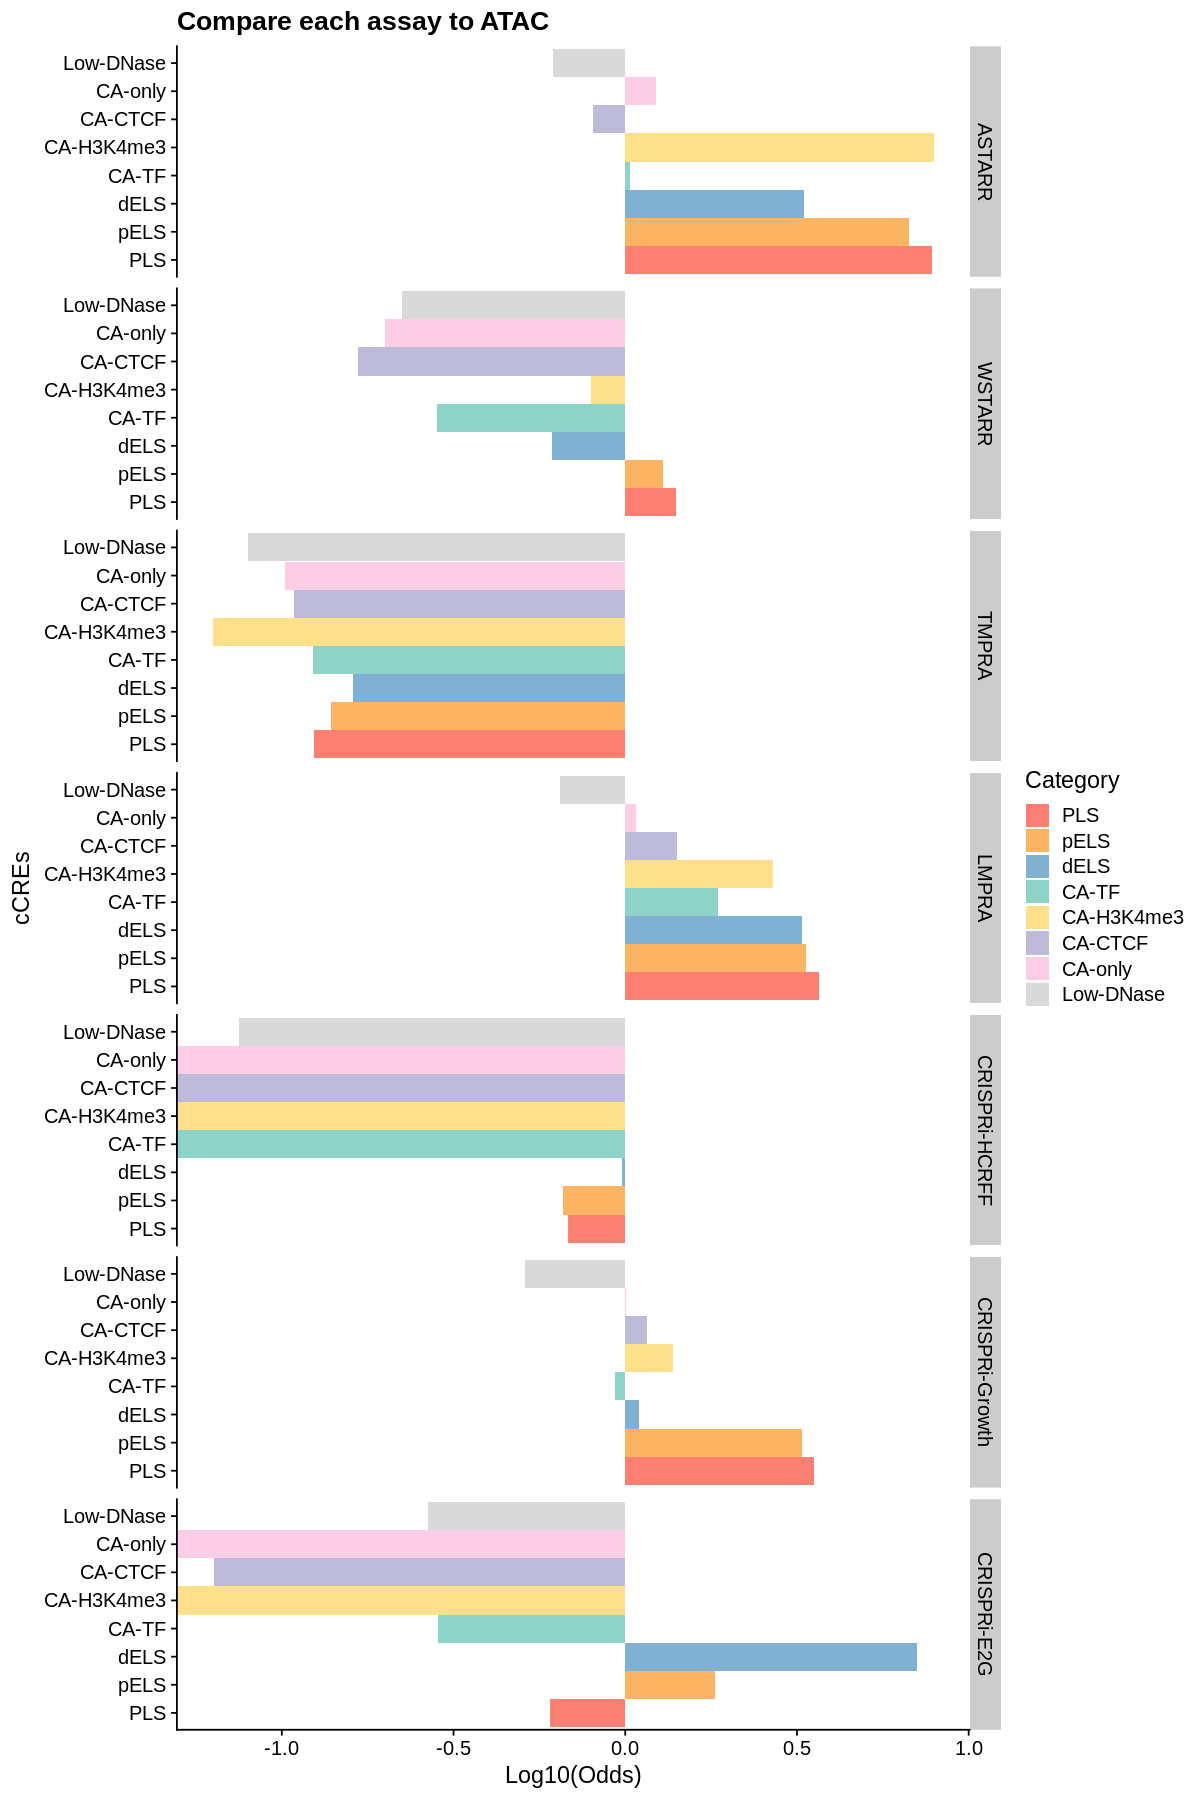

In [66]:
dat = dat_peak_annot_summary
dat = dat %>% 
    dplyr::filter(Assay=="ATAC") %>% 
    dplyr::select(Category, Freq) %>%
    dplyr::rename("Freq_ATAC" = "Freq")

dat = dplyr::left_join(
    dat_peak_annot_summary,
    dat,
    by = "Category"
)

dat = dat %>%
    dplyr::mutate(Odds = Freq / Freq_ATAC) %>%
    dplyr::filter(Assay != "ATAC")


vec = c("ATAC", "ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth", "CRISPRi-E2G")
dat = dat %>% dplyr::mutate(Assay = factor(Assay, levels=vec))

vec = c("PLS", "pELS", "dELS", "CA-TF", "CA-H3K4me3", "CA-CTCF", "CA-only", "Low-DNase")
dat = dat %>% dplyr::mutate(Category = factor(Category, levels=vec))

vec = c(
    "PLS"        = "#fb8072", 
    "pELS"       = "#fdb462", 
    "dELS"       = "#80b1d3", 
    "CA-TF"      = "#8dd3c7", 
    "CA-H3K4me3" = "#fee08b",  
    "CA-CTCF"    = "#bebada", 
    "CA-only"    = "#fccde5", 
    "Low-DNase"  = "#d9d9d9")
theme_fill = scale_fill_manual(values = vec)

gpt = ggplot(dat, aes(x=log10(Odds), y=Category, fill=Category)) +
    geom_col(width=1, position = position_dodge(width = 0.9)) +
    labs(x="Log10(Odds)", y="cCREs", title="Compare each assay to ATAC") +
    geom_
    theme_cowplot() +
    theme_fill +
    facet_grid(Assay~.)

options(repr.plot.height=15, repr.plot.width=10)
print(gpt)

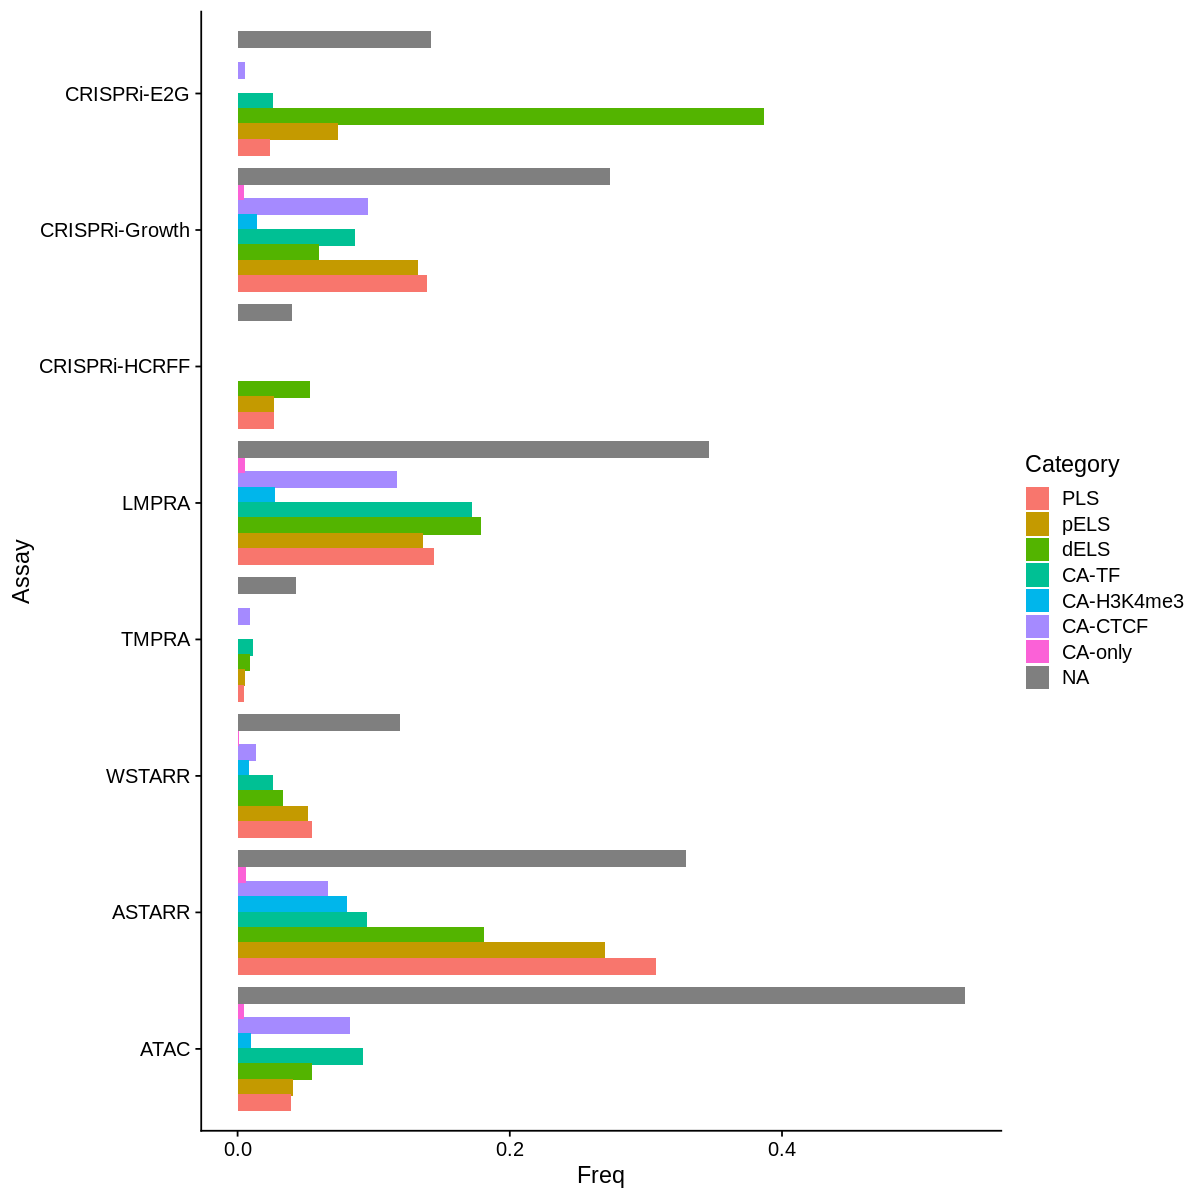

In [37]:
dat = dat_peak_annot_summary

vec = c("ATAC", "ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth", "CRISPRi-E2G")
dat = dat %>% dplyr::mutate(Assay = factor(Assay, levels=vec))

vec = c("PLS", "pELS", "dELS", "CA-TF", "CA-H3K4me3", "CA-CTCF", "CA-only", "Low-DNase")
dat = dat %>% dplyr::mutate(Category = factor(Category, levels=vec))

vec = c(
    "PLS"        = "#fb8072", 
    "pELS"       = "#fdb462", 
    "dELS"       = "#80b1d3", 
    "CA-TF"      = "#8dd3c7", 
    "CA-H3K4me3" = "#fee08b",  
    "CA-CTCF"    = "#bebada", 
    "CA-only"    = "#fccde5", 
    "Low-DNase"  = "#d9d9d9")
theme_fill = scale_fill_manual(values = vec)

gpt = ggplot(dat, aes(x=Freq, y=Category, fill=Category)) +
    geom_col(width=1, position = position_dodge(width = 0.9)) +
    labs(x="Frequency", y="cCREs") +
    theme_cowplot() +
    theme_fill +
    facet_grid(Assay~.)

options(repr.plot.height=15, repr.plot.width=10)
print(gpt)

## Bootstrapping and Score